# DataSet de Hoter Bookings
---

## Entendimiento del Negocio

## Analisis De los Datos

In [1]:
import os
import requests

url = "https://raw.githubusercontent.com/DIANASTI/hotel_bookings/main/hotel_bookings.csv"
strFile = "hotel_bookings.csv"

# Verifica si el Dataset ya existe
if not os.path.isfile(strFile):
    response = requests.get(url)

    if response.status_code == 200:
        with open(strFile, "wb") as file:
            file.write(response.content)
        print(f"\033[92mArchivo {strFile} descargado correctamente.\033[0m")
    else:
        print(f"\033[91mError al descargar el archivo {strFile}.\033[0m")
else:
    print(f"\033[93mEl archivo {strFile} existe.\033[0m")

Archivo hotel_bookings.csv descargado correctamente.


In [3]:
import pandas as pd
pdData = pd.read_csv(strFile)
pdData

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [8]:
#buscamos la cantidad de nulos en el dataframe original
for feature in pdData.columns:
    flaNull = pdData[feature].isna().sum()#suma de los null
    flaNoNull = pdData[feature].notna().sum()#suma de los no null
    flaTotal = flaNoNull + flaNull # total de los datos
    flaPorcentaje = (flaNull/ flaTotal) * 100 # calculando el porcentaje de nulos
    #imprimiendo mensaje
    print('\033[96mValores nulos y no nulos de', feature, ':')
    print('\033[93mTotal de valores nulos:', flaNull)
    print('\033[92mLos nulos representan el', round(flaPorcentaje, 2), '%\n')

Valores nulos y no nulos de hotel :
Total de valores nulos: 0
Los nulos representan el 0.0 %

Valores nulos y no nulos de is_canceled :
Total de valores nulos: 0
Los nulos representan el 0.0 %

Valores nulos y no nulos de lead_time :
Total de valores nulos: 0
Los nulos representan el 0.0 %

Valores nulos y no nulos de arrival_date_year :
Total de valores nulos: 0
Los nulos representan el 0.0 %

Valores nulos y no nulos de arrival_date_month :
Total de valores nulos: 0
Los nulos representan el 0.0 %

Valores nulos y no nulos de arrival_date_week_number :
Total de valores nulos: 0
Los nulos representan el 0.0 %

Valores nulos y no nulos de arrival_date_day_of_month :
Total de valores nulos: 0
Los nulos representan el 0.0 %

Valores nulos y no nulos de stays_in_weekend_nights :
Total de valores nulos: 0
Los nulos representan el 0.0 %

Valores nulos y no nulos de stays_in_week_nights :
Total de valores nulos: 0
Los nulos representan el 0.0 %

Valores nulos y no nulos de adults :
Total de v

investigamos las columnas que mas nulos presentan, que son **company** y **agent**

In [10]:
pdData.company.notna()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: company, Length: 119390, dtype: bool

segun el caso lo que se encuentra en **company** son los `id` de las compañias encargadas de hacer el registro 

In [13]:
pdData.company.unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

ahora revisamos los Nulos de la columna `agent`

In [15]:
pdData.agent.notna()

0         False
1         False
2         False
3          True
4          True
          ...  
119385     True
119386     True
119387     True
119388     True
119389     True
Name: agent, Length: 119390, dtype: bool

In [17]:
pdData.agent.unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

Podemos ver que los datos de **agent** tambien son `id`

lanzamos un describe general para ver los datos de estadistica descriptiva basica del dataframe original


In [18]:
pdData.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


vemos los tipos de datos que se presentan en el dataframe original

In [19]:
pdData.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## Preparacion de los datos

para evitar alterar los datos originales hacemos una copia de los datos, de esta manera podemos alterar y modificar sin causar alterasiones en los datos originales

In [21]:
Copiax1=pdData.copy()

In [22]:
#tratamiento de datos nulos, transformando los datos de company y agent en 00, ya que su tipo de dato es int, y por que cuentan con gran porcentaje de nulos, mientras que para la columna 
#mientras que para las columnas children y country que cuentan con un porcentaje mucho menor de nulos(), estos mismos son eliminados
Copiax1['company'].fillna(00, inplace=True)
Copiax1['agent'].fillna(00, inplace=True)
Copiax1.dropna(subset=['children'],inplace=True)
Copiax1.dropna(subset=['country'],inplace=True)

In [23]:
#vemos los nulos de la copia del dataframe, y en la cual los nulos fueron tratados.
for feature in Copiax1.columns:
    flaNull = Copiax1[feature].isna().sum()#suma de los null
    flaNoNull = Copiax1[feature].notna().sum()#suma de los no null
    flaTotal = flaNoNull + flaNull # total de los datos
    flaPorcentaje = (flaNull/ flaTotal) * 100 # calculando el porcentaje de nulos
    #imprimiendo mensaje
    print('Valores nulos y no nulos de', feature, ':\nTotal de valores nulos:', flaNull, '\nTotal de valores no nulos:', flaNoNull)
    print(f"los nulos representan el {round(flaPorcentaje,2)}% \n")

Valores nulos y no nulos de hotel :
Total de valores nulos: 0 
Total de valores no nulos: 118898
los nulos representan el 0.0% 

Valores nulos y no nulos de is_canceled :
Total de valores nulos: 0 
Total de valores no nulos: 118898
los nulos representan el 0.0% 

Valores nulos y no nulos de lead_time :
Total de valores nulos: 0 
Total de valores no nulos: 118898
los nulos representan el 0.0% 

Valores nulos y no nulos de arrival_date_year :
Total de valores nulos: 0 
Total de valores no nulos: 118898
los nulos representan el 0.0% 

Valores nulos y no nulos de arrival_date_month :
Total de valores nulos: 0 
Total de valores no nulos: 118898
los nulos representan el 0.0% 

Valores nulos y no nulos de arrival_date_week_number :
Total de valores nulos: 0 
Total de valores no nulos: 118898
los nulos representan el 0.0% 

Valores nulos y no nulos de arrival_date_day_of_month :
Total de valores nulos: 0 
Total de valores no nulos: 118898
los nulos representan el 0.0% 

Valores nulos y no nulo

In [24]:
#Miramos los datos de paises.
Copiax1.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [25]:
#los datos dentro de la variables is_canceled, son 0, que representa cuando la reserva no es cancelada, y el 1 cuando si es cancelada la reserva
Copiax1.is_canceled.unique()

array([0, 1])

In [26]:
#Se agrupan y se busca aquellos datos en donde children sea igual o mayor a uno
Familias = Copiax1[Copiax1['children'] >= 1].groupby(['adults', 'children']).size().reset_index(name='Cantidad')
#ordenar de mayor a menor
Mayor_menor = Familias.sort_values(by='Cantidad', ascending=False)
# Ordenar por la mayor cantidad de niños por adulto hospedado 
ordenar = Mayor_menor.head(3)
print("cantidad de niños por cada dulto")
print(ordenar)

cantidad de niños por cada dulto
    adults  children  Cantidad
6        2       1.0      4080
7        2       2.0      3246
10       3       1.0       487


## Modeling

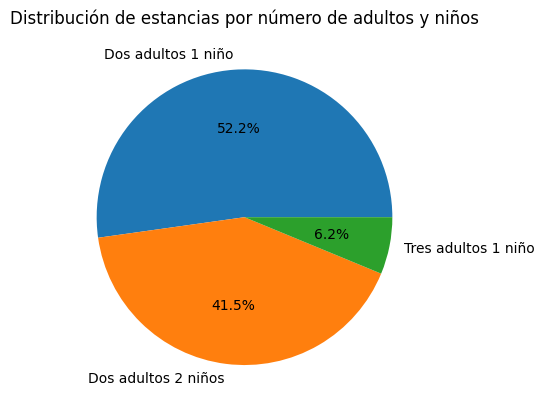

In [28]:
import matplotlib.pyplot as plt

Familias = Copiax1[Copiax1['children'] >= 1].groupby(['adults', 'children']).size().reset_index(name='Cantidad')
# Ordenar de mayor a menor
Mayor_menor = Familias.sort_values(by='Cantidad', ascending=False)
# Ordenar por la mayor cantidad de niños por adulto hospedado
ordenar = Mayor_menor.head(3)
#crear variable que ordena en base a cantidad para poder hacer el grafico
cantidades = ordenar['Cantidad']
labels = ['Dos adultos 1 niño', 'Dos adultos 2 niños', 'Tres adultos 1 niño'] 
plt.pie(cantidades, labels=labels, autopct='%1.1f%%')
plt.title('Distribución de estancias por número de adultos y niños')
plt.show()


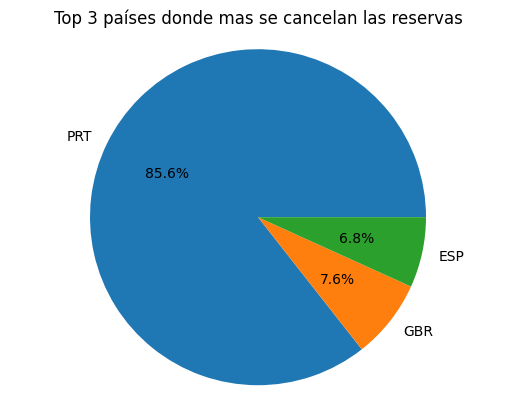

In [30]:
#Agrupar buscando aquellos valores que sean iguales a 1 para buscar en donde se cancelo la reserva y agrupar las columnas country e is_canceled
#luego ver el tamaño de la cantidad de datos iguales a 1 por pais y para crear una columna llamada cantidad con la que despues puedo trabajar en crear el filtro que me ordene
# de mayor a menor y para poder obtener el top 3 de paises
Paises = Copiax1[Copiax1['is_canceled'] == 1].groupby(['country', 'is_canceled']).size().reset_index(name='Cantidad')

#ordenar de mayor a menor
Mayor_menor = Paises.sort_values(by='Cantidad', ascending=False)

# Conseguir los tres paises en donde mas se repite el 1, que segun el caso, el 1 representa si se cancelo la reserva
Los_tres = Mayor_menor.head(3)

#Grafico de torta en donde se ven por porcentajes los tres paises que mas reservas canceladas tienen.
plt.pie(Los_tres['Cantidad'], labels=Los_tres['country'], autopct='%1.1f%%')
plt.title('Top 3 países donde mas se cancelan las reservas')
plt.axis('equal')  
plt.show()

In [31]:
Paises = Copiax1[Copiax1['is_canceled'] == 1].groupby(['country', 'is_canceled']).size().reset_index(name='Cantidad')

#ordenar de mayor a menor
Mayor_menor = Paises.sort_values(by='Cantidad', ascending=False)

# Conseguir los tres paises en donde mas se repite el 1, que segun el caso, el 1 representa si se cancelo la reserva
Los_tres = Mayor_menor.head(3)
#describe para ver medias estadisticas de los 127 paises del data set
Mayor_menor.describe()


,is_canceled,Cantidad
count,127.0,127.000000
mean,1.0,347.661417
std,0.0,2459.791336
min,1.0,1.000000
25%,1.0,3.000000
50%,1.0,11.000000
75%,1.0,40.000000
max,1.0,27515.000000


In [33]:
#lista de paises, en base al orden en que aparecen en el dataframe 
agrupado = Copiax1[Copiax1['is_canceled'] == 1].groupby(['country', 'is_canceled']).size()
# Imprimir el resultado
print(agrupado)

country  is_canceled
AGO      1              205
ALB      1                2
AND      1                5
ARE      1               43
ARG      1               54
                       ... 
VGB      1                1
VNM      1                2
ZAF      1               31
ZMB      1                1
ZWE      1                2
Length: 127, dtype: int64


In [37]:
Paises = Copiax1[Copiax1['is_canceled'] == 1].groupby(['country', 'is_canceled']).size().reset_index(name='Cantidad')

#ordenar de mayor a menor
Mayor_menor = Paises.sort_values(by='Cantidad', ascending=False)

# Conseguir los tres paises en donde mas se repite el 1, que segun el caso, el 1 representa si se cancelo la reserva
Los_tres = Mayor_menor.head(3)
#describe para ver medias estadisticas de los 127 paises del data set
Mayor_menor.describe()


,is_canceled,Cantidad
count,127.0,127.000000
mean,1.0,347.661417
std,0.0,2459.791336
min,1.0,1.000000
25%,1.0,3.000000
50%,1.0,11.000000
75%,1.0,40.000000
max,1.0,27515.000000
